First, the code loads the data and preprocesses it by separating the input 'gdp' from the target variable 'electricity_demand'.

Then, the code splits the data into training and testing sets and creates an instance of the SVR model with an RBF kernel. The model is fit to the training data. The mean squared error and R^2 of the predictions is also calculated.

In [4]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('cleaned.csv')

# Preprocess the data
X = data['gdp'].values.reshape(-1, 1)
y = data['electricity_demand'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'epsilon': [0.01, 0.1, 1, 10]}

# Create an instance of the SVR model
svr = SVR(kernel='rbf')

# Perform a grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best C value:", grid_search.best_params_['C'])
print("Best epsilon value:", grid_search.best_params_['epsilon'])

# Create an instance of the SVR model
svr = SVR(kernel='rbf', C=100, epsilon=10)

# Fit the model to the training data
svr.fit(X_train, y_train)

# Predict the electricity demand for the test data
y_pred = svr.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

from sklearn.metrics import r2_score

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

# Print the R-squared value
print("R-squared:", r2)

Best C value: 100
Best epsilon value: 10
Mean Squared Error: 150798.3786113159
R-squared: 0.750625337996317


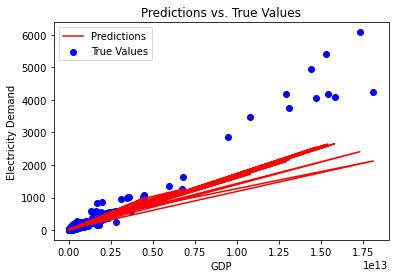

In [5]:
import matplotlib.pyplot as plt

# Plot the predicted values
plt.plot(X_test, y_pred, color='red', label='Predictions')

# Plot the true values
plt.scatter(X_test, y_test, color='blue', label='True Values')

# Add labels and legend to the plot
plt.title('Predictions vs. True Values')
plt.xlabel('GDP')
plt.ylabel('Electricity Demand')
plt.legend()

# Show the plot
plt.show()